# IMPORT DATA

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn')

<ipython-input-1-43da6b6aad79>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive

Mounted at /content/drive
'Bản sao của 05. Practice 3: Analysis.gsheet'   IELTS
'Colab Notebooks'			       'spotify-2023- Huyen.gsheet'
 Data_Science				        SWISS_CODING
 FRANCE					        thuyettrinh.docx
'hinh NT HT.jpg'			       'Tran Le Huong Huyen.pdf'


In [ ]:
!cd /content/drive/MyDrive/SWISS_CODING/Practice

In [ ]:
df_2018 = pd.read_excel('/content/drive/MyDrive/SWISS_CODING/Practice/hotel_revenue_historical_full.xlsx', sheet_name = '2018')
df_2019 = pd.read_excel('/content/drive/MyDrive/SWISS_CODING/Practice/hotel_revenue_historical_full.xlsx', sheet_name = '2019')
df_2020 = pd.read_excel('/content/drive/MyDrive/SWISS_CODING/Practice/hotel_revenue_historical_full.xlsx', sheet_name = '2020')

In [ ]:
df_2018.head()

In [ ]:
df_2019.head()

In [ ]:
df_2020.head()

In [ ]:
df_full = pd.concat([df_2018, df_2019, df_2020])
df_full.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


# CLEAN DATA AND HANDLING VALUE

In [ ]:
df_full = df_full.convert_dtypes()

In [ ]:
df_full.drop(['company','agent'], axis =1, inplace = True)
df_full.dropna(inplace =True)

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141314 entries, 0 to 40686
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141314 non-null  string        
 1   is_canceled                     141314 non-null  Int64         
 2   lead_time                       141314 non-null  Int64         
 3   arrival_date_year               141314 non-null  Int64         
 4   arrival_date_month              141314 non-null  string        
 5   arrival_date_week_number        141314 non-null  Int64         
 6   arrival_date_day_of_month       141314 non-null  Int64         
 7   stays_in_weekend_nights         141314 non-null  Int64         
 8   stays_in_week_nights            141314 non-null  Int64         
 9   adults                          141314 non-null  Int64         
 10  children                        141314 non-null  Int64        

In [ ]:
df_full['arrival_month'] = pd.to_datetime(df_full['arrival_date_year'].astype(str) + '-' + df_full['arrival_date_month'].astype(str).astype(str))
df_full['arrival_month'] = df_full['arrival_month'].dt.strftime('%m')
df_full.tail()

<ipython-input-8-a06c105f984c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_full['arrival_month'] = pd.to_datetime(df_full['arrival_date_year'].astype(str) + '-' + df_full['arrival_date_month'].astype(str).astype(str))


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_month
40682,City Hotel,1,1,2020,February,5,1,0,0,1,...,0,No Deposit,0,Transient,0.0,0,1,No-Show,2020-02-01,02
40683,City Hotel,1,31,2020,July,29,16,2,0,1,...,1,No Deposit,0,Transient,135.0,0,2,No-Show,2020-07-16,07
40684,City Hotel,1,25,2020,May,18,6,2,1,1,...,0,No Deposit,0,Transient,125.0,0,0,No-Show,2020-05-06,05
40685,City Hotel,1,6,2020,July,29,17,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,No-Show,2020-07-17,07
40686,City Hotel,1,0,2020,August,31,2,0,2,1,...,0,No Deposit,0,Transient,65.0,0,1,No-Show,2020-08-02,08


In [ ]:
df_loc = df_full[['hotel', 'arrival_date_year', 'arrival_month', 'is_canceled', 'reservation_status', 'lead_time', 'previous_cancellations', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr',
                   'market_segment', 'distribution_channel', 'is_repeated_guest', 'booking_changes', 'deposit_type',
                  'customer_type', 'reserved_room_type'
                  ]]
df_loc.head()

,hotel,arrival_date_year,arrival_month,is_canceled,reservation_status,lead_time,previous_cancellations,stays_in_weekend_nights,stays_in_week_nights,adr,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,customer_type,reserved_room_type
0,Resort Hotel,2018,07,1,Canceled,85,0,0,3,82.0,Online TA,TA/TO,0,0,No Deposit,Transient,A
1,Resort Hotel,2018,07,1,Canceled,75,0,0,3,105.5,Offline TA/TO,TA/TO,0,0,No Deposit,Transient,D
2,Resort Hotel,2018,07,1,Canceled,23,0,0,4,123.0,Online TA,TA/TO,0,0,No Deposit,Transient,E
3,Resort Hotel,2018,07,1,Canceled,60,0,2,5,107.0,Online TA,TA/TO,0,0,No Deposit,Transient,E
4,Resort Hotel,2018,07,1,Canceled,96,0,2,8,108.3,Direct,Direct,0,0,No Deposit,Transient,E


# CACULATION

### Revenue / Loss

In [ ]:
df_loc['total_night'] = df_loc['stays_in_week_nights'] + df_loc['stays_in_weekend_nights']
df_loc['revenue'] = df_loc['total_night'] * df_loc['adr']
df_loc.head()

<ipython-input-10-ed78530d6fbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['total_night'] = df_loc['stays_in_week_nights'] + df_loc['stays_in_weekend_nights']
<ipython-input-10-ed78530d6fbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['revenue'] = df_loc['total_night'] * df_loc['adr']


,hotel,arrival_date_year,arrival_month,is_canceled,reservation_status,lead_time,previous_cancellations,stays_in_weekend_nights,stays_in_week_nights,adr,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,customer_type,reserved_room_type,total_night,revenue
0,Resort Hotel,2018,07,1,Canceled,85,0,0,3,82.0,Online TA,TA/TO,0,0,No Deposit,Transient,A,3,246.0
1,Resort Hotel,2018,07,1,Canceled,75,0,0,3,105.5,Offline TA/TO,TA/TO,0,0,No Deposit,Transient,D,3,316.5
2,Resort Hotel,2018,07,1,Canceled,23,0,0,4,123.0,Online TA,TA/TO,0,0,No Deposit,Transient,E,4,492.0
3,Resort Hotel,2018,07,1,Canceled,60,0,2,5,107.0,Online TA,TA/TO,0,0,No Deposit,Transient,E,7,749.0
4,Resort Hotel,2018,07,1,Canceled,96,0,2,8,108.3,Direct,Direct,0,0,No Deposit,Transient,E,10,1083.0


### Reservation status

Reservation last status, assuming one of three categories:

- Canceled – booking was canceled by the customer;

- Check-Out – customer has checked in but already departed;

- No-Show – customer did not check-in and did inform the hotel of the reason why



In [ ]:
df_res_status = df_loc[df_loc['reservation_status'].isin(['Canceled', 'Check-Out'])]
df_res_status.head()

,hotel,arrival_date_year,arrival_month,is_canceled,reservation_status,lead_time,previous_cancellations,stays_in_weekend_nights,stays_in_week_nights,adr,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,customer_type,reserved_room_type
0,Resort Hotel,2018,07,1,Canceled,85,0,0,3,82.0,Online TA,TA/TO,0,0,No Deposit,Transient,A
1,Resort Hotel,2018,07,1,Canceled,75,0,0,3,105.5,Offline TA/TO,TA/TO,0,0,No Deposit,Transient,D
2,Resort Hotel,2018,07,1,Canceled,23,0,0,4,123.0,Online TA,TA/TO,0,0,No Deposit,Transient,E
3,Resort Hotel,2018,07,1,Canceled,60,0,2,5,107.0,Online TA,TA/TO,0,0,No Deposit,Transient,E
4,Resort Hotel,2018,07,1,Canceled,96,0,2,8,108.3,Direct,Direct,0,0,No Deposit,Transient,E


In [ ]:
df_year_status = df_res_status.groupby(['arrival_date_year', 'reservation_status'])['is_canceled'].count().reset_index()
df_year_status.rename(columns = {'is_canceled': 'total'}, inplace= True)
df_year_status

,arrival_date_year,reservation_status,total
0,2018,Canceled,7918
1,2018,Check-Out,13753
2,2019,Canceled,27874
3,2019,Check-Out,50053
4,2020,Canceled,15386
5,2020,Check-Out,24870


In [ ]:
df_year_status.to_excel("res_status_year.xlsx", index=True)

In [ ]:
df_hotel_type_status = df_res_status.groupby(['hotel','arrival_date_year', 'reservation_status'])['is_canceled'].count().reset_index()
df_hotel_type_status.head()

,hotel,arrival_date_year,reservation_status,is_canceled
0,City Hotel,2018,Canceled,5864
1,City Hotel,2018,Check-Out,7677
2,City Hotel,2019,Canceled,20712
3,City Hotel,2019,Check-Out,30497
4,City Hotel,2020,Canceled,11448


In [ ]:
df_hotel_type_status.to_excel("hotel_res_status.xlsx", index=True)

In [ ]:
df_hotel_type_status_month = df_res_status.groupby(['hotel','arrival_month', 'reservation_status'])['is_canceled'].count().reset_index()
df_hotel_type_status_month.head()

,hotel,arrival_month,reservation_status,is_canceled
0,City Hotel,01,Canceled,1426
1,City Hotel,01,Check-Out,2254
2,City Hotel,02,Canceled,1711
3,City Hotel,02,Check-Out,3064
4,City Hotel,03,Canceled,2298


In [ ]:
df_hotel_type_status_month.to_excel("hotel_res_status_month.xlsx", index=True)

In [ ]:
df_demo = df_res_status.groupby(['hotel', 'reservation_status'])['is_canceled'].count().reset_index()
df_demo

,hotel,reservation_status,is_canceled
0,City Hotel,Canceled,38024
1,City Hotel,Check-Out,53991
2,Resort Hotel,Canceled,13154
3,Resort Hotel,Check-Out,34685


For the reservation status, I can caculate the total of "check-out", "canceled" bookings of each months, years and hotels.



### ADR

Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [ ]:
# Average ADR in 3 years
df_mean_adr_year = df_loc.groupby(['arrival_date_year'])[['adr']].mean().reset_index()
df_mean_adr_year

,arrival_date_year,adr
0,2018,87.294361
1,2019,95.166776
2,2020,114.777777


In [ ]:
df_mean_adr_year.to_excel("mean_adr_year.xlsx", index=True)

In [ ]:
# Average ADR group by month, years, hotel
df_hote_mean_adr_year = df_res_status.groupby(['hotel', 'arrival_date_year', 'arrival_month', 'reservation_status'])[['adr']].mean().reset_index()
df_hote_mean_adr_year.head()

,hotel,arrival_date_year,arrival_month,reservation_status,adr
0,City Hotel,2018,7,Canceled,67.745447
1,City Hotel,2018,7,Check-Out,73.591481
2,City Hotel,2018,8,Canceled,73.623372
3,City Hotel,2018,8,Check-Out,81.740096
4,City Hotel,2018,9,Canceled,97.480998


In [ ]:
df_hote_mean_adr_year.to_excel("hotel_mean_adr_year.xlsx", index=True)

In [ ]:
# Revenue/ Loss group by res status
df_revenue = df_res_status.groupby('reservation_status')[['revenue']].sum().reset_index()
df_revenue

,reservation_status,revenue
0,Canceled,18559577.57
1,Check-Out,30441316.26


In [ ]:
df_revenue.to_excel("df_revenue.xlsx", index=True)

In [ ]:
# Revenue/ Loss group by res status, hotel
df_sum = df_res_status.groupby(['hotel', 'arrival_date_year', 'arrival_month', 'reservation_status'])[['adr']].sum().reset_index()
df_sum.head()

,hotel,arrival_date_year,arrival_month,reservation_status,adr
0,City Hotel,2018,07,Canceled,62190.32
1,City Hotel,2018,07,Check-Out,33778.49
2,City Hotel,2018,08,Canceled,89305.15
3,City Hotel,2018,08,Check-Out,102011.64
4,City Hotel,2018,09,Canceled,147488.75


In [ ]:
df_sum.to_excel("hotel_sum_adr_month.xlsx", index=True)

### Customer type

Type of booking, assuming one of four categories: Contract, Group, Transient and Transient- Party

In [ ]:
# Cus type usually cancel booking
df_cus_type = df_res_status.groupby(['customer_type', 'hotel', 'arrival_date_year', 'reservation_status'])['is_canceled'].count().reset_index()
df_cus_type.head()

,customer_type,hotel,arrival_date_year,reservation_status,is_canceled
0,Contract,City Hotel,2018,Canceled,995
1,Contract,City Hotel,2018,Check-Out,1080
2,Contract,City Hotel,2019,Canceled,1078
3,Contract,City Hotel,2019,Check-Out,1181
4,Contract,City Hotel,2020,Canceled,7


In [ ]:
df_cus_type.to_excel("cus_type.xlsx", index=True)

### Room type

Code of room type reserved. Code is presented instead of designation for anonymity reasons.

In [ ]:
df_room_type = df_res_status.groupby(['reserved_room_type', 'hotel', 'reservation_status'])['is_canceled'].count().reset_index()
df_room_type.head()

,reserved_room_type,hotel,reservation_status,is_canceled
0,A,City Hotel,Canceled,32209
1,A,City Hotel,Check-Out,42069
2,A,Resort Hotel,Canceled,7852
3,A,Resort Hotel,Check-Out,20434
4,B,City Hotel,Canceled,411


In [ ]:
df_room_type.to_excel("room_type.xlsx", index=True)

In [ ]:
# check price of each room types
df_room_type_adr = df_res_status.groupby('reserved_room_type')[['adr']].mean().reset_index()
df_room_type_adr

,reserved_room_type,adr
0,A,89.273617
1,B,88.701754
2,C,156.865704
3,D,118.570245
4,E,123.28405
5,F,164.37612
6,G,173.223543
7,H,185.596285
8,L,124.666667
9,P,0.0


In [ ]:
df_room_type_adr.to_excel("room_type_adr.xlsx", index=True)

### Market segment

Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [ ]:
df_segment = df_res_status.groupby(['market_segment', 'hotel', 'reservation_status'])[['is_canceled']].count().reset_index()
df_segment.rename(columns = {'is_canceled': 'total'}, inplace= True)
df_segment

,market_segment,hotel,reservation_status,total
0,Aviation,City Hotel,Canceled,41
1,Aviation,City Hotel,Check-Out,185
2,Complementary,City Hotel,Canceled,60
3,Complementary,City Hotel,Check-Out,599
4,Complementary,Resort Hotel,Canceled,30
5,Complementary,Resort Hotel,Check-Out,198
6,Corporate,City Hotel,Canceled,696
7,Corporate,City Hotel,Check-Out,2797
8,Corporate,Resort Hotel,Canceled,409
9,Corporate,Resort Hotel,Check-Out,2250


In [ ]:
df_segment.to_excel("market_segment.xlsx", index=True)

In [ ]:
df_market_segment_adr = df_res_status.groupby('market_segment')[['adr']].mean().reset_index()
df_market_segment_adr

,market_segment,adr
0,Aviation,100.821593
1,Complementary,2.895039
2,Corporate,69.187266
3,Direct,114.779056
4,Groups,78.147001
5,Offline TA/TO,86.55636
6,Online TA,115.85739


In [ ]:
df_market_segment_adr.to_excel("market_segment_adr.xlsx", index=True)

### Lead time

Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

In [ ]:
# group data for lead_time
df_lead_time = df_res_status.groupby(['hotel', 'reservation_status', 'lead_time'])[['is_canceled']].count().reset_index()
df_lead_time.rename(columns = {'is_canceled': 'total'}, inplace= True)
df_lead_time

,hotel,reservation_status,lead_time,total
0,City Hotel,Canceled,0,258
1,City Hotel,Canceled,1,214
2,City Hotel,Canceled,2,113
3,City Hotel,Canceled,3,132
4,City Hotel,Canceled,4,123
...,...,...,...,...
1614,Resort Hotel,Check-Out,468,17
1615,Resort Hotel,Check-Out,532,2
1616,Resort Hotel,Check-Out,542,23
1617,Resort Hotel,Check-Out,709,1


In [ ]:
df_lead_time.to_excel("lead_time.xlsx", index=True)

In [ ]:
df_lead_time_avg = df_lead_time.groupby(['hotel', 'reservation_status'])[['lead_time']].median().reset_index()
df_lead_time_avg

,hotel,reservation_status,lead_time
0,City Hotel,Canceled,225.5
1,City Hotel,Check-Out,191.5
2,Resort Hotel,Canceled,192.0
3,Resort Hotel,Check-Out,198.5


### Deposit type

Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

- No Deposit – no deposit was made;

- Non Refund – a deposit was made in the value of the total stay cost;

- Refundable – a deposit was made with a value under the total cost of stay.



In [ ]:
df_res_status['deposit_type'].value_counts().reset_index()

,deposit_type,count
0,No Deposit,121400
1,Non Refund,18289
2,Refundable,165


In [ ]:
df_deposit_cancel = df_res_status.groupby(['deposit_type', 'hotel', 'reservation_status'])[['is_canceled']].count().reset_index()
df_deposit_cancel

,deposit_type,hotel,reservation_status,is_canceled
0,No Deposit,City Hotel,Canceled,22066
1,No Deposit,City Hotel,Check-Out,53956
2,No Deposit,Resort Hotel,Canceled,10922
3,No Deposit,Resort Hotel,Check-Out,34456
4,Non Refund,City Hotel,Canceled,15944
5,Non Refund,City Hotel,Check-Out,26
6,Non Refund,Resort Hotel,Canceled,2211
7,Non Refund,Resort Hotel,Check-Out,108
8,Refundable,City Hotel,Canceled,14
9,Refundable,City Hotel,Check-Out,9


In [ ]:
df_deposit_cancel.to_excel("deposit_type_cancel.xlsx", index=True)

### Correalation

In [ ]:
df_corr = df_full.drop(['arrival_date_month' ,'assigned_room_type', 'reserved_room_type', 'country', 'reservation_status'], axis='columns')

In [ ]:
df_corr = pd.get_dummies(df_corr, columns = ['hotel', 'meal', 'deposit_type', 'customer_type', 'market_segment', 'distribution_channel'])

In [ ]:
corr_mx = df_corr.corr()

In [ ]:
df_corr_loc = df_full[['hotel', 'is_canceled', 'lead_time', 'adults', 'market_segment','is_repeated_guest',
                       'previous_cancellations','booking_changes',
                       'deposit_type','customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests']]
df_corr_loc.head()

,hotel,is_canceled,lead_time,adults,market_segment,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,1,85,2,Online TA,0,0,0,No Deposit,Transient,82.0,0,1
1,Resort Hotel,1,75,2,Offline TA/TO,0,0,0,No Deposit,Transient,105.5,0,0
2,Resort Hotel,1,23,2,Online TA,0,0,0,No Deposit,Transient,123.0,0,0
3,Resort Hotel,1,60,2,Online TA,0,0,0,No Deposit,Transient,107.0,0,2
4,Resort Hotel,1,96,2,Direct,0,0,0,No Deposit,Transient,108.3,0,2


In [ ]:
df_corr_loc = df_corr_loc[df_corr_loc['deposit_type'].isin(['No Deposit', 'Non Refund'])]
df_corr_loc = df_corr_loc[df_corr_loc['customer_type'].isin(['Transient-Party', 'Transient'])]
df_corr_loc = df_corr_loc[df_corr_loc['market_segment'].isin(['Direct', 'Corporate','Groups', 'Online TA', 'Offline TA/TO'])]

In [ ]:
df_corr_loc = pd.get_dummies(df_corr_loc, columns = ['hotel', 'deposit_type', 'customer_type', 'market_segment'])

In [ ]:
df_corr_loc.columns

Index(['is_canceled', 'lead_time', 'adults', 'is_repeated_guest',
       'previous_cancellations', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'hotel_City Hotel', 'hotel_Resort Hotel', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'customer_type_Transient',
       'customer_type_Transient-Party', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups'],
      dtype='object')

In [ ]:
corr_mx = df_corr_loc.corr()

Text(0.5, 1.0, 'Affect of all featues on cancelation')

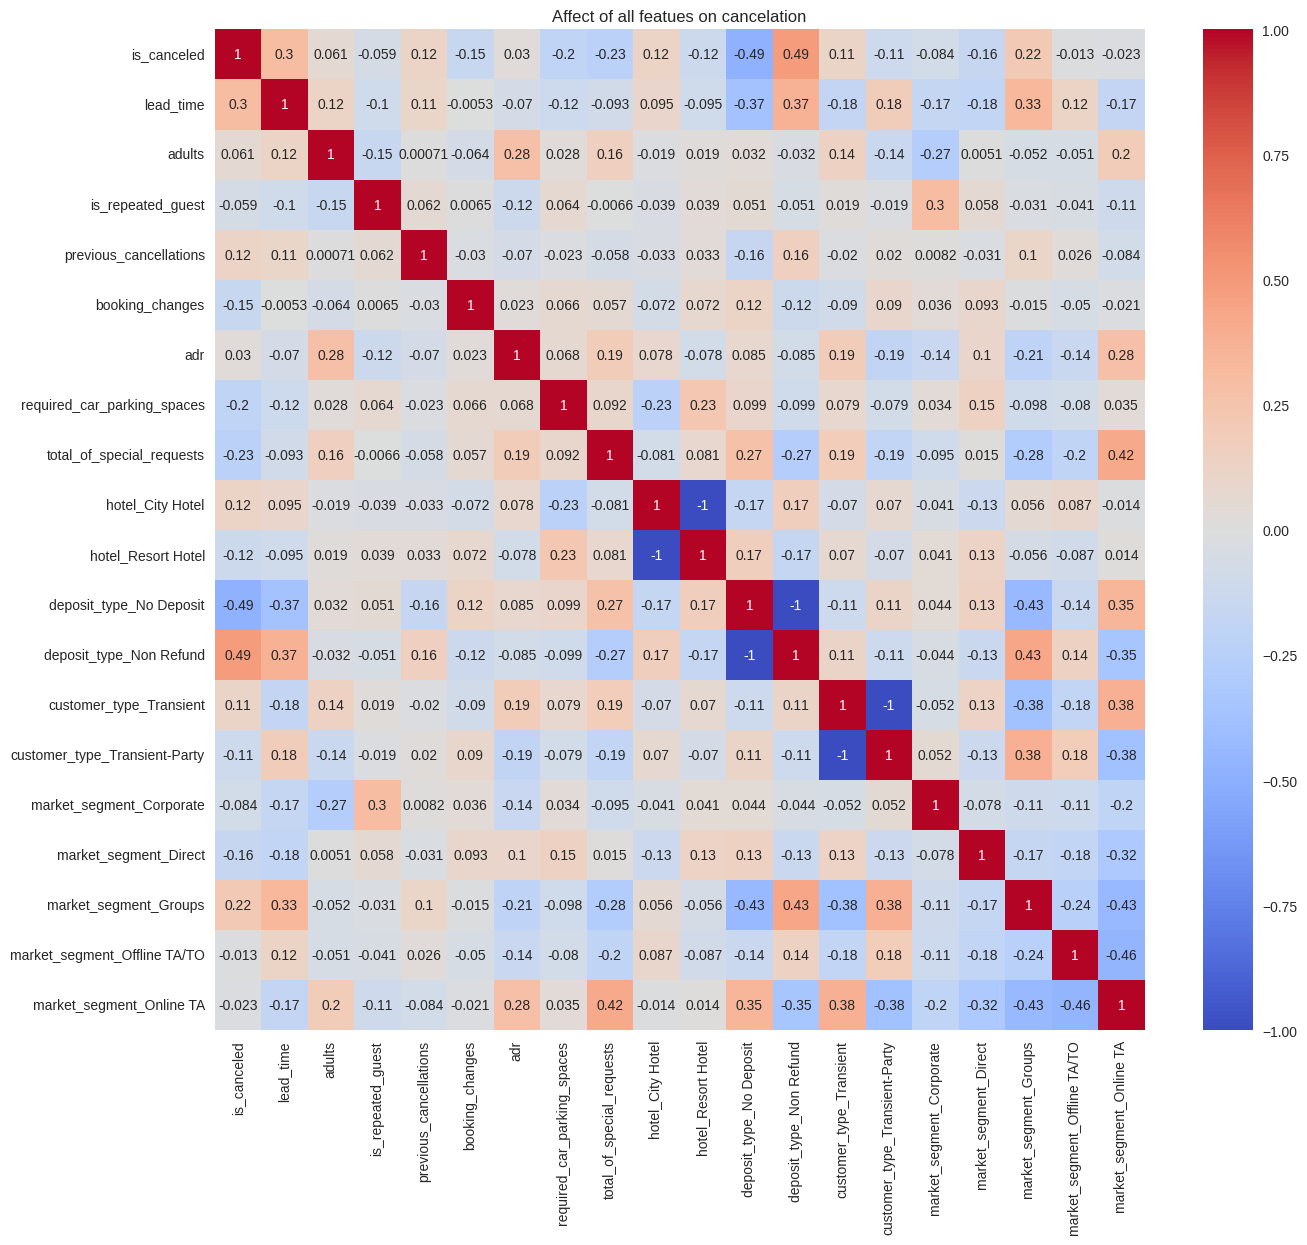

In [ ]:
plt.figure(figsize=(15, 13))
sns.heatmap(corr_mx, annot=True, cmap='coolwarm')
plt.title('Affect of all featues on cancelation')

### Regression

In [ ]:
df_full_1 = df_full[['hotel', 'is_canceled', 'lead_time', 'adults', 'market_segment','is_repeated_guest',
                       'previous_cancellations','booking_changes',
                       'deposit_type','customer_type', 'adr', 'total_of_special_requests']]

In [ ]:
df_full_2 = pd.get_dummies(df_full_1, columns= ['hotel', 'customer_type', 'market_segment', 'deposit_type'])

In [ ]:
df_full_2.columns

Index(['is_canceled', 'lead_time', 'adults', 'is_repeated_guest',
       'previous_cancellations', 'booking_changes', 'adr',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable'],
      dtype='object')

In [ ]:
df_reg = df_full_2[['hotel_City Hotel', 'hotel_Resort Hotel', 'is_canceled', 'lead_time', 'adults', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups',
                       'previous_cancellations','booking_changes', 'market_segment_Offline TA/TO', 'market_segment_Online TA',
                       'deposit_type_No Deposit', 'deposit_type_Non Refund','customer_type_Transient','customer_type_Transient-Party', 'adr', 'total_of_special_requests']]

In [ ]:
df_reg['hotel_City Hotel'] = df_reg['hotel_City Hotel'].astype(int)
df_reg['hotel_Resort Hotel'] = df_reg['hotel_Resort Hotel'].astype(int)
df_reg['market_segment_Corporate'] = df_reg['market_segment_Corporate'].astype(int)
df_reg['market_segment_Direct'] = df_reg['market_segment_Direct'].astype(int)
df_reg['market_segment_Groups'] = df_reg['market_segment_Groups'].astype(int)
df_reg['market_segment_Groups'] = df_reg['market_segment_Offline TA/TO'].astype(int)
df_reg['market_segment_Groups'] = df_reg['market_segment_Online TA'].astype(int)
df_reg['deposit_type_No Deposit'] = df_reg['deposit_type_No Deposit'].astype(int)
df_reg['deposit_type_Non Refund'] = df_reg['deposit_type_Non Refund'].astype(int)
df_reg['customer_type_Transient'] = df_reg['customer_type_Transient'].astype(int)
df_reg['customer_type_Transient-Party'] = df_reg['customer_type_Transient-Party'].astype(int)

<ipython-input-41-452ca5314378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['hotel_City Hotel'] = df_reg['hotel_City Hotel'].astype(int)
<ipython-input-41-452ca5314378>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['hotel_Resort Hotel'] = df_reg['hotel_Resort Hotel'].astype(int)
<ipython-input-41-452ca5314378>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
df_reg = df_reg.astype(float)

In [ ]:
X = df_reg[['lead_time', 'adults', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA',
            'previous_cancellations','booking_changes',
            'deposit_type_No Deposit', 'deposit_type_Non Refund','customer_type_Transient','customer_type_Transient-Party', 'adr', 'total_of_special_requests']]

X = sm.add_constant(X)

y = df_reg['is_canceled']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            is_canceled   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     5043.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:36:23   Log-Likelihood:                -69227.
No. Observations:              141314   AIC:                         1.385e+05
Df Residuals:                  141299   BIC:                         1.386e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         